# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [92]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.jpg')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

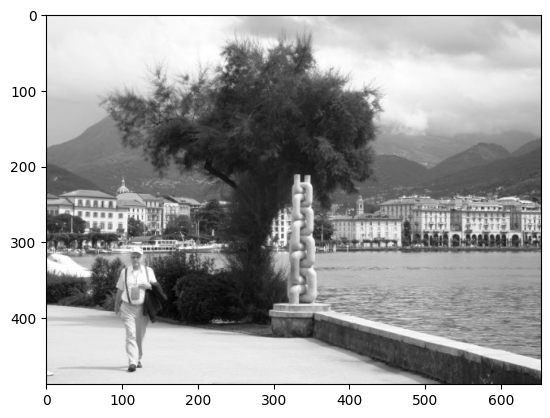

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [94]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

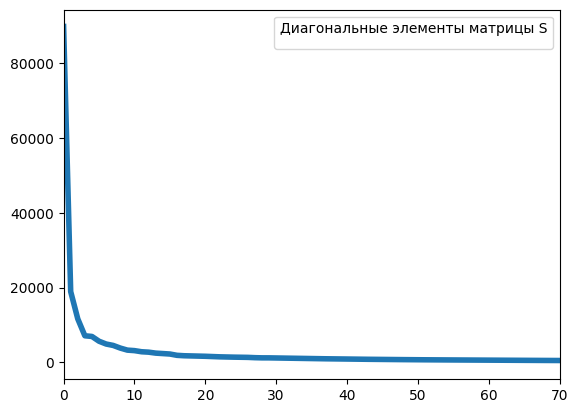

In [95]:
plt.plot(S, linewidth = 4)
plt.legend(title='Диагональные элементы матрицы S')
plt.xlim(0,70)
plt.show()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

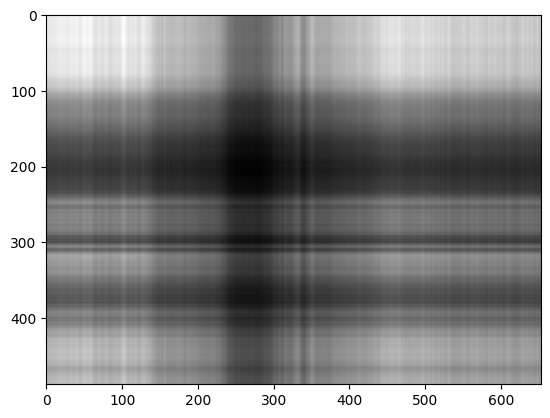

In [96]:
S_1 = S.copy()
S_1[1:] = 0
A_1 = U @ np.diag(S_1) @ VT 
plt.imshow(A_1, cmap='gray')



---


> ШОК!
Хоть 1 элемент и несёт в себе много информации о крупных объектах на сцене, сам по себе он не очень информативен, но без него никуда, дальше это будет видно

---





**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

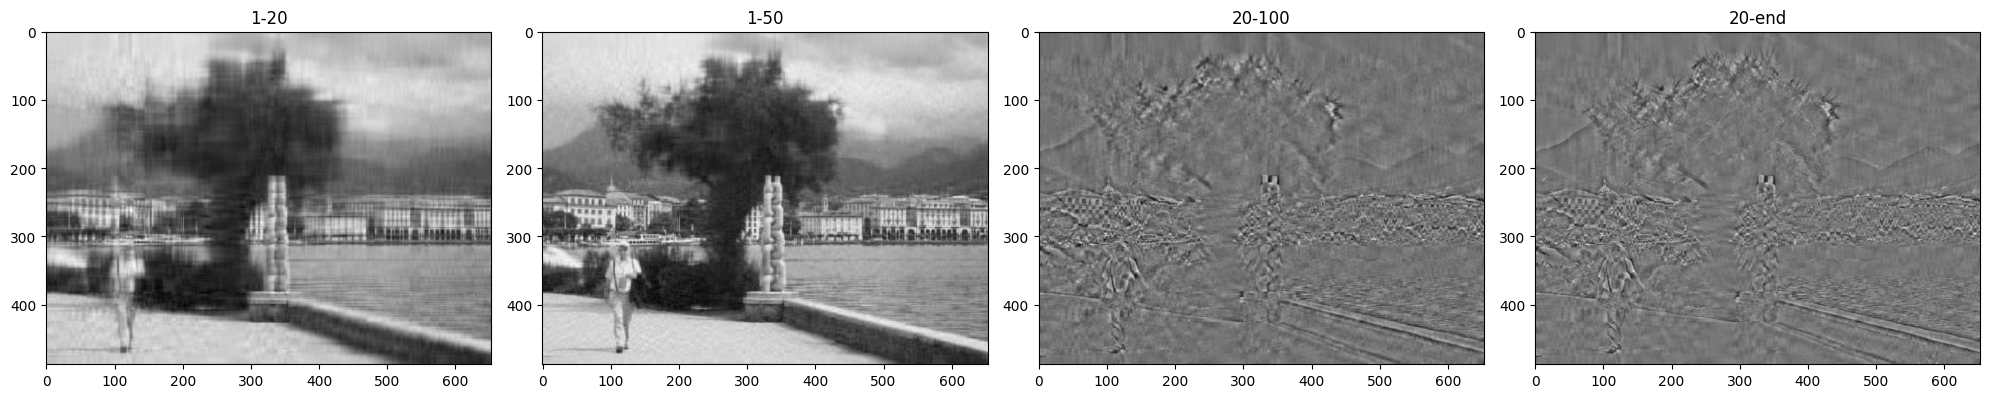

In [97]:
S_20 = S.copy()
S_50 = S.copy()
S_100 = S.copy()
S_20_end = S.copy()

S_20[21:] = 0
S_50[51:] = 0
S_100[:20] = S_100[100:] = 0
S_20_end[:21] = 0

A_20 = U @ np.diag(S_20) @ VT 
A_50 = U @ np.diag(S_50) @ VT 
A_100 = U @ np.diag(S_100) @ VT 
A_20_end = U @ np.diag(S_20_end) @ VT 
fig, axes = plt.subplots(1, 4, figsize=(20, 10))


axes[0].imshow(A_20, cmap='gray')
axes[0].set_title('1-20')


axes[1].imshow(A_50, cmap='gray')
axes[1].set_title('1-50')

axes[2].imshow(A_100, cmap='gray')
axes[2].set_title('20-100')

axes[3].imshow(A_20_end, cmap='gray')
axes[3].set_title('20-end')

plt.tight_layout()
plt.show()



---



> Видно что 2 картинка получилась самой чёткой, без каких либо значительный отклонений от оригинала. Как и предполагалось, хвосты не несут в себе ключевую информацию


---




**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*



---



> Не смотря на то, что казалось бы после 20 компоненты их вклад минимален, судя по графику, на практике, как это видно выше первых 20 не совсем достаточно, необходимо захватить с собой ещё некое количество хвостов, они несут в себе информацию о границах и мелких деталях объектов.

---





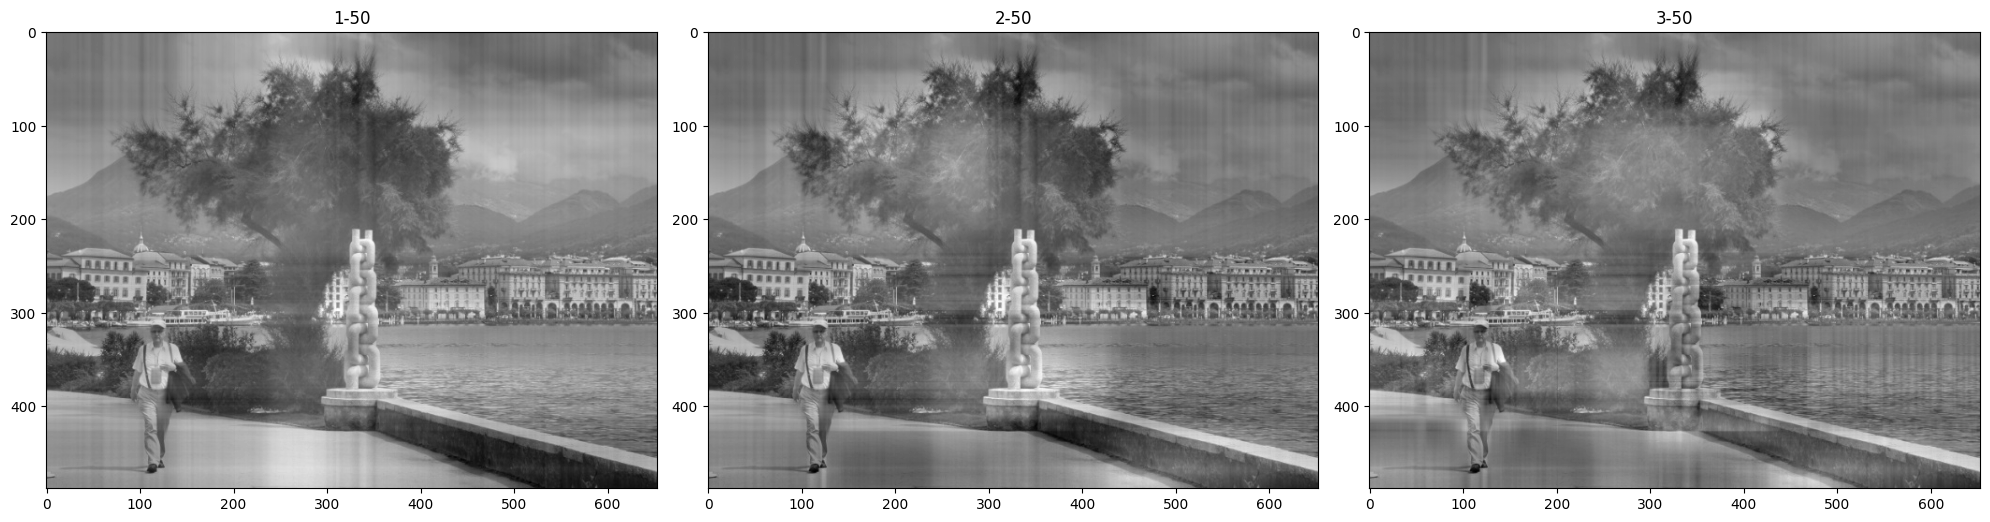

In [98]:
S_1_50 = S.copy()
S_2_50 = S.copy()
S_3_50 = S.copy()

S_1_50[:1] = 0
S_2_50[:2] = 0
S_3_50[:3] = 0

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

A_1_50 = U @ np.diag(S_1_50) @ VT 
A_2_50 = U @ np.diag(S_2_50) @ VT 
A_3_50 = U @ np.diag(S_3_50) @ VT 


axes[0].imshow(A_1_50, cmap='gray')
axes[0].set_title('1-50')

axes[1].imshow(A_2_50, cmap='gray')
axes[1].set_title('2-50')

axes[2].imshow(A_3_50, cmap='gray')
axes[2].set_title('3-50')

plt.tight_layout()
plt.show()



---


> Видно, что первые компоненты ни в коем случае нельзя удалять

---





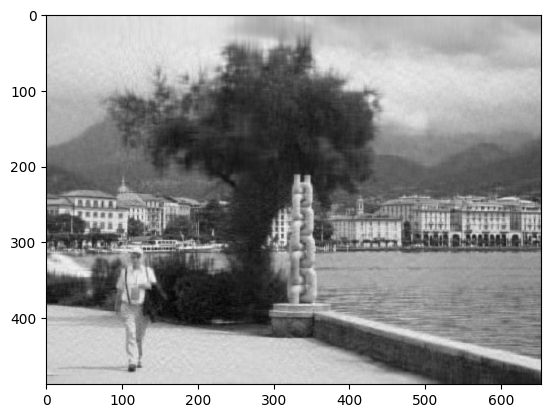

In [99]:
S_60 = S.copy()
S_60[60:] = 0
A_60 = U @ np.diag(S_60) @ VT 
plt.imshow(A_60, cmap='gray')
plt.show()



---



> Таким образом нужно захватить с собой все самые первые и весомые значения сигма, и желательно сверху ещё 30 поменьше, если хочется сохранить детализацию фотографии

---





**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

In [100]:
n, m = img.shape
r = np.linalg.matrix_rank(np.diag(S_60)) #остановимся на 60 компонентах для большей детализации

print(m * n / (r * (m + n + 1)))

4.65067133683596




---



> Теоретически мы ужали изображение почти в 5 раз почти не потеряв в качестве

---





**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [101]:
print(img.nbytes / (U[:60][:].nbytes + S[:60].nbytes + VT[:][:60].nbytes))

4.65067133683596




---

> Всё сошлось ⇒ цифры не врут, а электроны правильно правильно переносят информацию
---





### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

$$X^TX = V\Sigma^2V^T$$
$$w = \alpha_1v_1+\ldots +\alpha_nv_n$$
$$|Xw|^2 = a_1^2\sigma_1^2 + \ldots + a_n^2 \sigma_n^2 \leq \sigma_1^2 (a_1^2+\ldots+a_n^2)$$
$$|Xw|\leq \sigma_1|w|$$
$$\frac{|Xw|}{|w|}\leq \sigma_1$$
По предположению $\sigma_1$ - наибольшее и является $1^{-ым}$ собственным вектором в матрице, тогда:
$$|Xw|^2=(Xw)^T(Xw)=w^TX^TXw=\sigma_1^2|w|^2 = \sigma_1^2$$(там строка ($1\sigma_1,0\sigma_2,\ldots,0\sigma_n$) на такой же стобец)\
Поэтому $\sigma_1 = $ максимуму по всем таким штукам \
Поскольку V - ортогональна, то $|w|$ = 1, как вектора ортонормированной системы $⇒ \sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$
$$Xv\leq \sigma_1|v|$$
$$|u^TXv|\leq|u^T||Xv|\leq|u^T|\sigma_1|v|$$
При $|u|=|v|=1$ получается требуемое равенство 

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

$\left(\begin{matrix}
\sin\left(0\right)*\cos\left(0\right) & \sin\left(0\right)*\cos\left(1\right) & \sin\left(0\right)*\cos\left(2\right) \\
\sin\left(1\right)*\cos\left(0\right) & \sin\left(1\right)*\cos\left(1\right) & \sin\left(1\right)*\cos\left(2\right) \\
\sin\left(2\right)*\cos\left(0\right) & \sin\left(2\right)*\cos\left(1\right) & \sin\left(2\right)*\cos\left(2\right)
\end{matrix}\right)\ = \ \left(\begin{matrix}
0 & 0 & 0 \\
\sin\left(1\right)*\cos\left(0\right) & \sin\left(1\right)*\cos\left(1\right) & \sin\left(1\right)*\cos\left(2\right) \\
\sin\left(2\right)*\cos\left(0\right) & \sin\left(2\right)*\cos\left(1\right) & \sin\left(2\right)*\cos\left(2\right)
\end{matrix}\right) $

Получается только 1 ЛНЗ строка $\Rightarrow$ rkA = 1 $⇒$ будет 1 ненулевая сигма в разложении матрицы ($\forall n >1$)

In [102]:
U, S, VT = svd(np.array(([0, 0,0], [np.sin(1), np.sin(1)*np.cos(1), np.sin(1)*np.cos(2)], [np.sin(2), np.sin(2)*np.cos(1), np.sin(2)*np.cos(2)])))
print(*S)

1.4995940527401406 7.440168456284353e-17 3.421711254289458e-17


Хм, интересно вышло из-за приближённого значения тригонометрических функций. Но 1 сингулярное значение - верное для данной матрицы, а другие стремятся к 0.\
 А исходная матрица разлагается как столбец синусов с аргументами от 0 до n - 1 на сигму на стоку соответсвующих косинусов.\
 Можно ортонормировать ветора из синусов и косинусов и соответственно изменить сигму.\
Тогда само значение сигма вычисляется как: $\sqrt{(sin(0)^2+\ldots + sin(n-1)^2)(cos(0)^2+\ldots+cos(n-1)^2)}$ 

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

$$\Sigma = U^{-1}AV$$
где U и V - ортонормированные матрицы -> ортонормированные системы -> ортонормирвоанные базисы в R^m и R^n.\
А матрица линейного отображения вычисляется по формуле:
$$(φ(v_1),\ldots,φ(v_n))=(u_1,\ldots,u_m) * (diag(\sigma_1,\ldots, \sigma_r, 0_{r+1}, \ldots, 0_n))$$
Получем, что $φ(u_i)=0 : \forall i >r ⇒kerA =⟨v_{r+1}, \ldots,v_n⟩ ⇒φ(v_1),\ldots, \varphi(v_r)-$ образуют базис $ImA$, что вложено в $⟨u_1, \ldots , u_r⟩$

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

Распишем и заметим:
$$(A^TA)^{-1} = (V\Sigma U^TU\Sigma V^T)^{-1} = (V\Sigma ^T\Sigma V^T)^{-1} = (\Sigma V^T)^{-1}(V\Sigma ^T)^{-1} ⇒ \Sigma = \Sigma ^{-1} ⇒ \Sigma  = E$$
Но раз $m \geq n$, стоит положить, что $\Sigma = diag(1_1, \ldots, 1_n, 0_{n+1}, \ldots, 0_m)$


**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


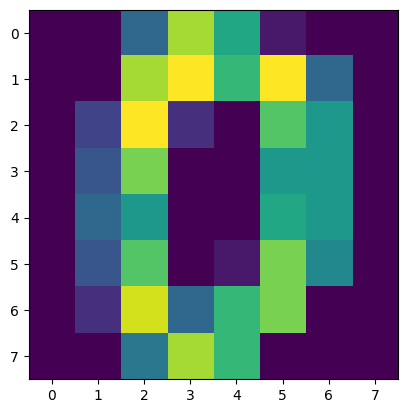

In [103]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [104]:
U, S, VT = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

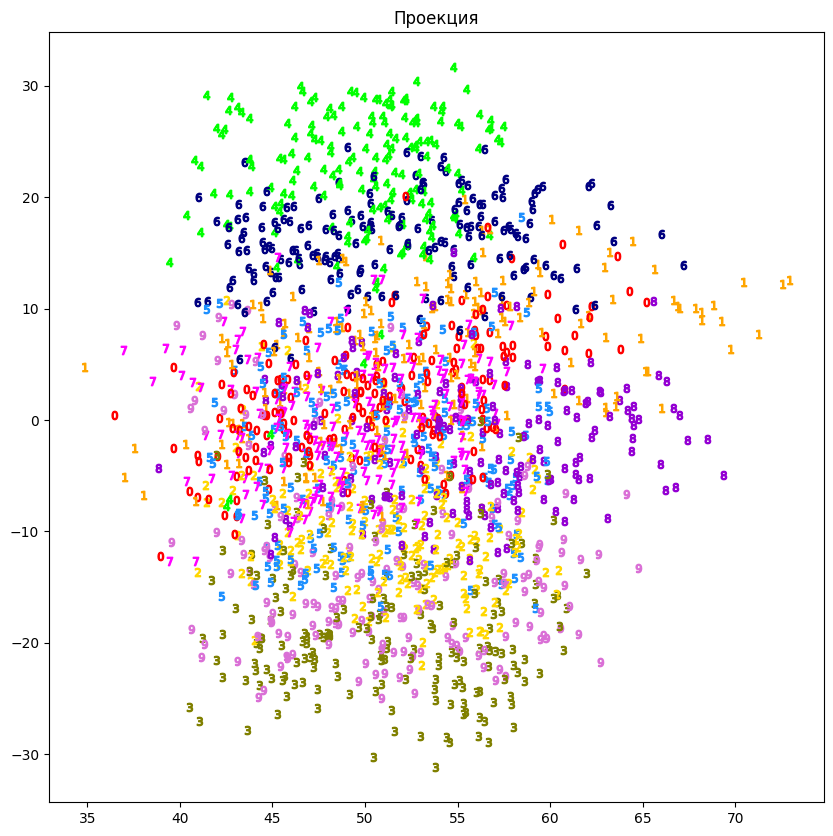

In [105]:
US = U[:, :2] @ np.diag(S[:2])
plt.figure(figsize=(10, 10))
plt.title('Проекция')
colors = np.array(['red', 'orange', 'gold', 'olive', 'lime', 'dodgerblue', 'navy', 'magenta', 'darkviolet', 'orchid'])
for i in range(digits.data.shape[0]):
    plt.scatter(US[i, 0], US[i, 1], marker=f'${digits.target[i]}$', color=colors[digits.target[i]])


**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

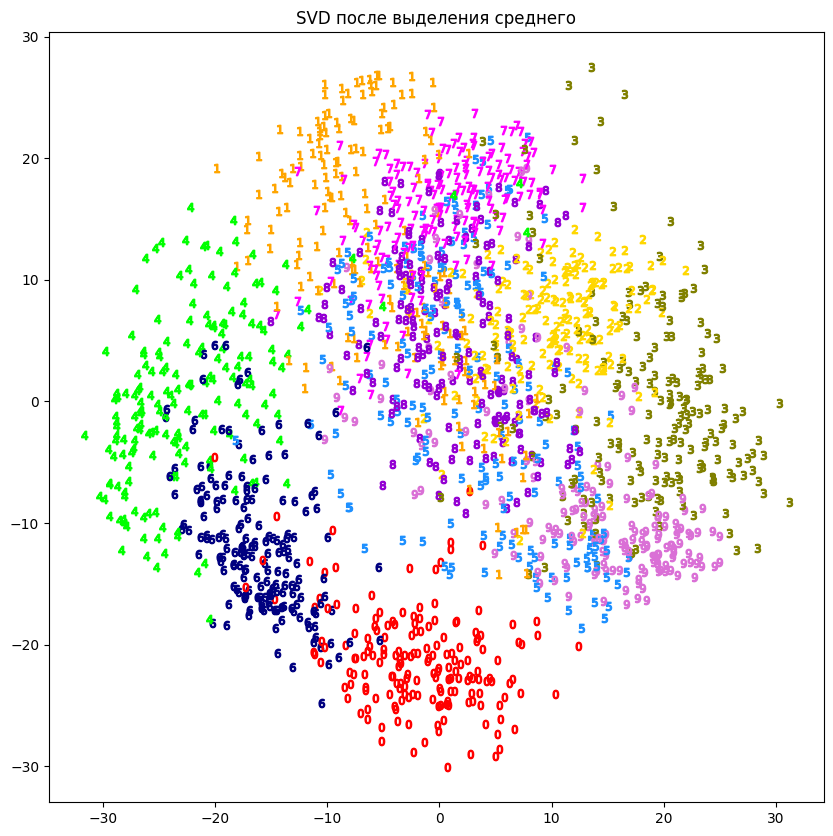

In [106]:
U, S, VT = svd(digits.data - digits.data.mean(axis=0), full_matrices=False)
US = U[:, :2] @ np.diag(S[:2])
plt.figure(figsize=(10, 10))
plt.title('SVD после выделения среднего')
for i in range(US.shape[0]):
    plt.scatter(US[i, 0], US[i, 1], marker=f'${digits.target[i]}$', color=colors[digits.target[i]])

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?



---

> Последняя легче поддаётся визуальному анализу, нет такого нагромаждения групп друг на друга. Сейчас они сосредоточены в своих кучках и находятся в разных частях поля. Их можно спокойно кластеризовать.

---





**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

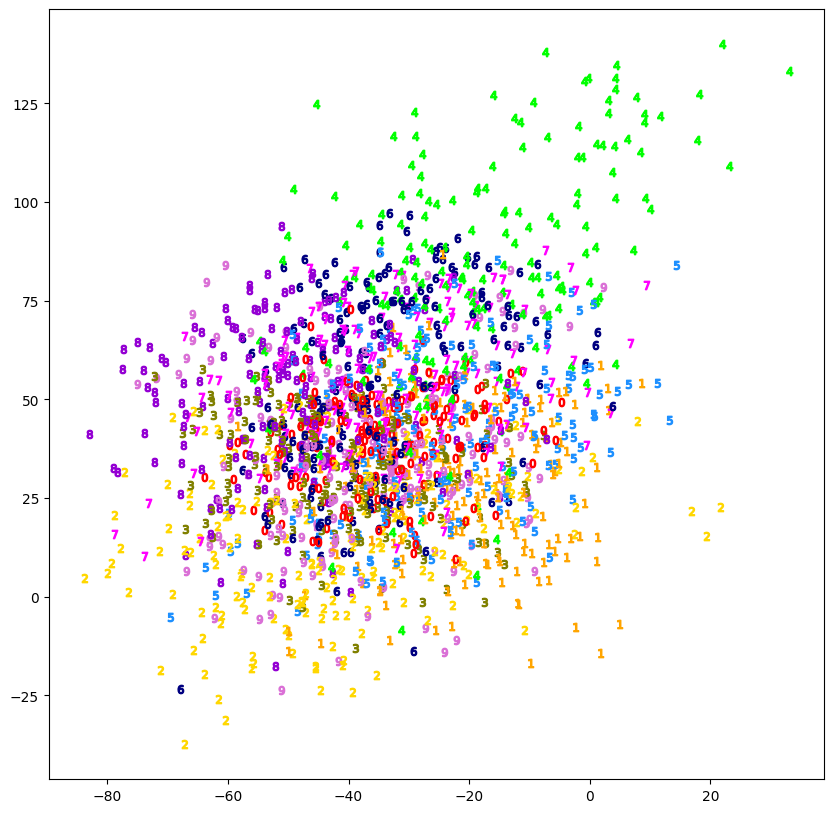

In [107]:
from sklearn.random_projection import GaussianRandomProjection
plt.figure(figsize=(10, 10))
grp = GaussianRandomProjection(n_components=2)
M = grp.fit_transform(digits.data)
for i in range(M.shape[0]):
    plt.scatter(M[i, 0], M[i, 1], marker=f'${digits.target[i]}$', color=colors[digits.target[i]])



---
Отцентрируем


---



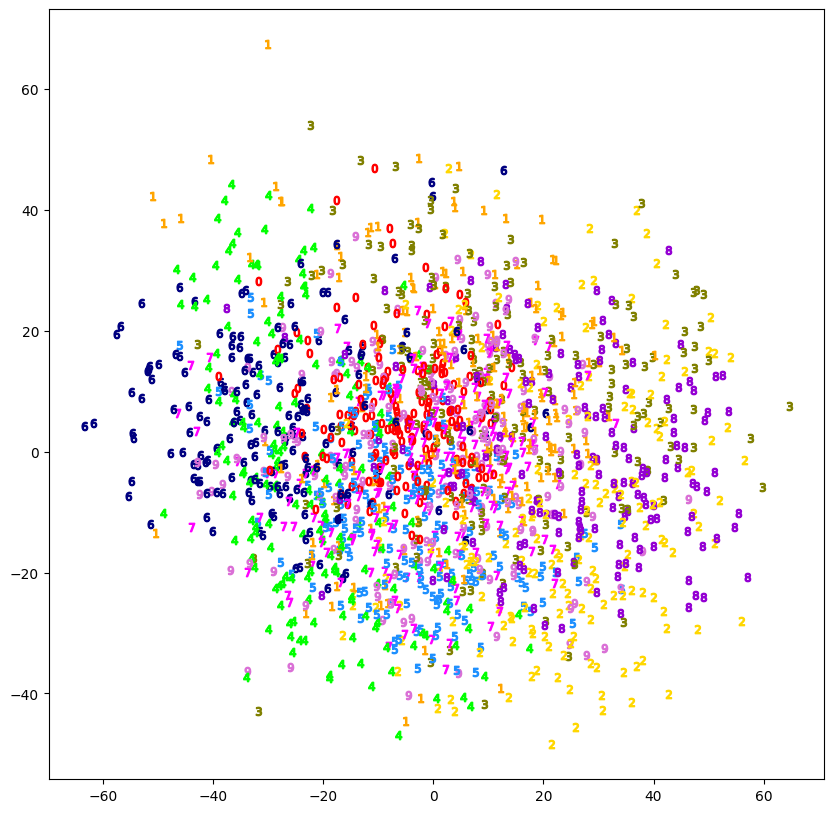

In [108]:
plt.figure(figsize=(10, 10))
grp = GaussianRandomProjection(n_components=2)
M = grp.fit_transform(digits.data - digits.data.mean(axis=0))
for i in range(M.shape[0]):
    plt.scatter(M[i, 0], M[i, 1], marker=f'${digits.target[i]}$', color=colors[digits.target[i]])

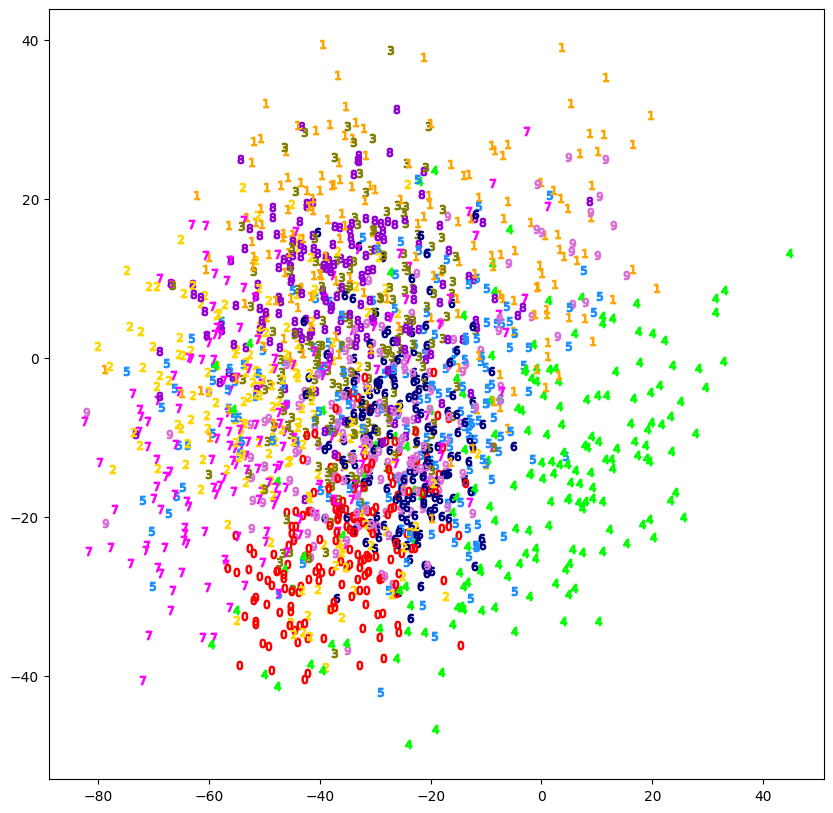

In [109]:
plt.figure(figsize=(10, 10))
grp = GaussianRandomProjection(n_components=4)
M = grp.fit_transform(digits.data)
for i in range(M.shape[0]):
    plt.scatter(M[i, 0], M[i, 1], marker=f'${digits.target[i]}$', color=colors[digits.target[i]])

* У SVD получается значительно лучше кластеризовать данные после их центровки, тут же облако точек похоже на месево, за исключением редких групп.
* Изменение параметров гауссовской проекции тоже не дало результатов.
* Вообщем не работает как мы того хотим эта штуковина.

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [110]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

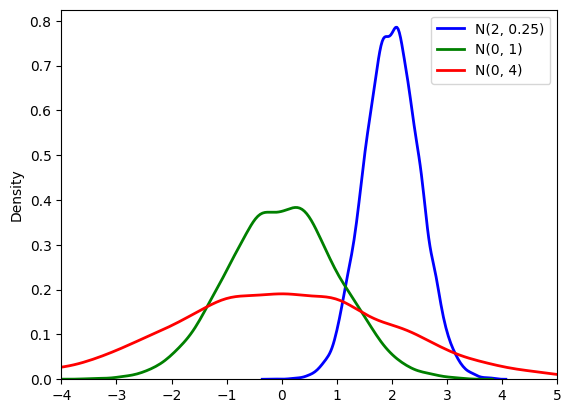

In [111]:
# N = 10000
# plt.xlim([-4,5])
# s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
# sns.distplot(s, hist=False, kde=True, 
#              bins=50,
#              kde_kws={'linewidth': 2}, label='N(2,0.25)')

# s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
# sns.distplot(s, hist=False, kde=True, 
#              bins=50,
#              kde_kws={'linewidth': 2}, label='N(0,1)')

# s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
# sns.distplot(s, hist=False, kde=True, 
#              bins=50,# color = 'darkblue',
#              kde_kws={'linewidth': 2}, label='N(0,4)')

# plt.legend()
# plt.show()

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

N = 10000
plt.xlim([-4, 5])

s = np.random.normal(loc=2, scale=0.5, size=N)
sns.kdeplot(data=s, 
            bw_method='scott',
            color='blue',
            linewidth=2,
            label='N(2, 0.25)')

s = np.random.normal(loc=0, scale=1, size=N)
sns.kdeplot(data=s, 
            bw_method='scott',
            color='green',
            linewidth=2,
            label='N(0, 1)')

s = np.random.normal(loc=0, scale=2, size=N)
sns.kdeplot(data=s, 
            bw_method='scott',
            color='red',
            linewidth=2,
            label='N(0, 4)')

plt.legend()
plt.show()


**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат. 
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

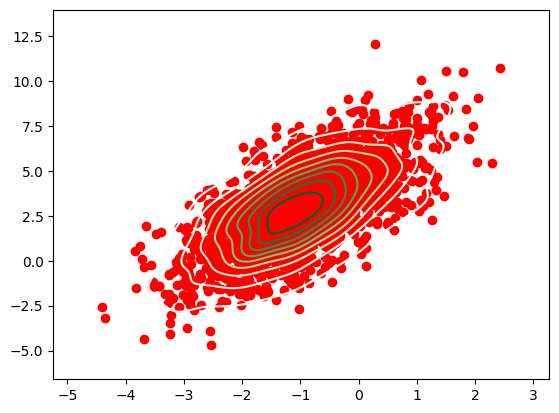

In [112]:
# import seaborn as sns
# import numpy as np

# N = 2000
# s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
# plt.scatter(s[:,0], s[:,1], color='red')
# sns.kdeplot(s, fill=False, color='g')

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1, 3]), cov=np.array([[1, 1.5], [1.5, 5]]), size=N)
plt.scatter(s[:, 0], s[:, 1], color='red')
sns.kdeplot(x=s[:, 0], y=s[:, 1], fill=False, cmap='Greens')
plt.show()


Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [113]:
np.random.seed(892048305)
X = np.random.multivariate_normal(mean=np.array([0, 0]), cov=np.array([[1, -2], [-2, 5]]), size=1000)

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

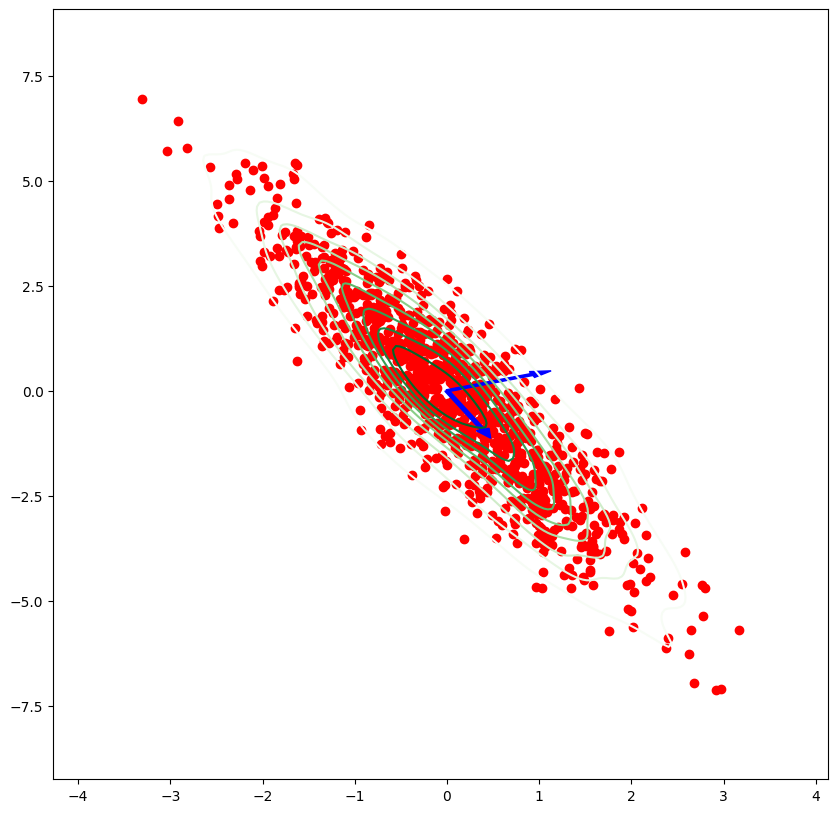

In [114]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], color='red')
plt.arrow(0, 0, VT[0][0], VT[0][1], color='b', width=0.05)
plt.arrow(0, 0, VT[1][0], VT[1][1], color='b', width=0.05)
sns.kdeplot(x=X[:, 0], y=X[:, 1], fill=False, cmap='Greens')
plt.show()

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$ \\
$$\left|\begin{matrix}
1-λ & -2 \\
-2 & 5 - λ
\end{matrix}\right| = 0 = λ^2-6λ+1$$ \\

$$\chi = λ^2-6λ+1 $$

$$λ_1 = 3 - 2\sqrt2\\
\lambda_2 = 3 + 2 \sqrt2$$
Направление $\lambda_i$ = базису этого собственного значения\
для $\lambda_1$ - это (1-$\sqrt2$, 1)\
для $\lambda_2$ - это (1+$\sqrt2$, 1)\
Что примерно похоже на нарисованные оси\
Ортонормируем их и получим базис "главных осей":
$$$|v_{1,2} = \sqrt{(1\pm\sqrt{2})^2 + 1} = \sqrt{4 \pm \sqrt2}  $$
$$e_1 = \frac {1}{\sqrt{4 - \sqrt2}} (1-\sqrt2, 1)^T $$
$$e_2 = \frac {1}{\sqrt{4 + \sqrt2}} (1+\sqrt2, 1)^T $$


Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

In [115]:
X1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[0.9, 2], [2, 4.2]]), size=1000)
X2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[0.9, 2], [2, 4.2]]), size=1000)

<ipython-input-115-cdaef26fe0cb>:1: RuntimeWarning: covariance is not positive-semidefinite.
  X1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[0.9, 2], [2, 4.2]]), size=1000)
<ipython-input-115-cdaef26fe0cb>:2: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[0.9, 2], [2, 4.2]]), size=1000)


**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

<Figure size 800x800 with 0 Axes>

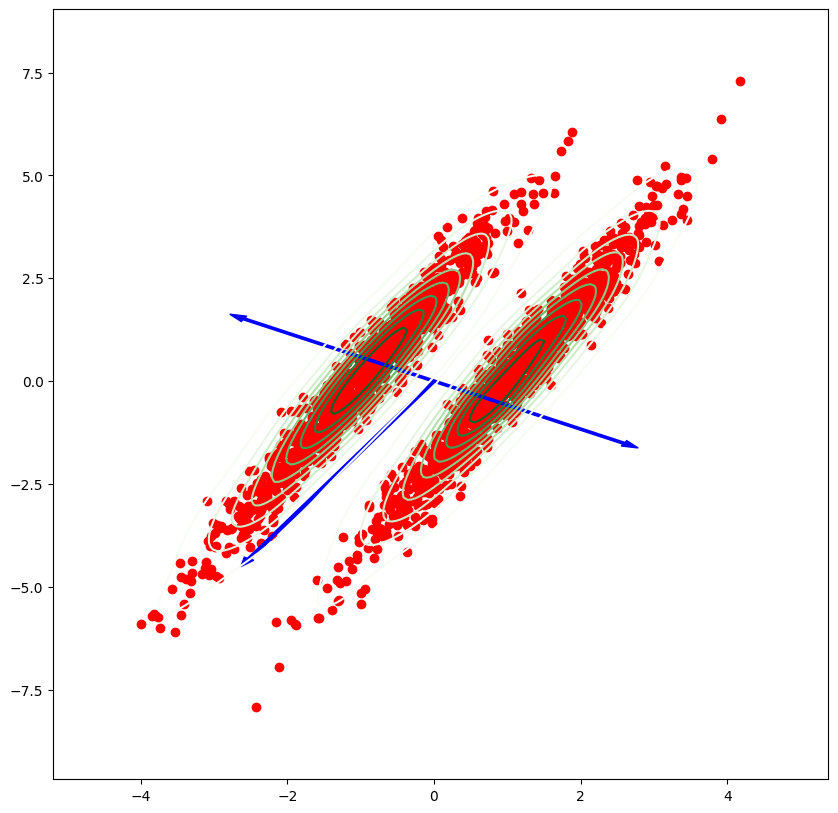

In [116]:
plt.figure(figsize=(8, 8))
X = np.concatenate((X1, X2), axis=0)
U, S, VT = np.linalg.svd(X, full_matrices=False)
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], color='red')
plt.arrow(0, 0, 5*VT[0][0], 5*VT[0][1], color='b', width=0.05)
plt.arrow(0, 0, 3*VT[1][0], 3*VT[1][1], color='b', width=0.05)
plt.arrow(0, 0, -3*VT[1][0], -3*VT[1][1], color='b', width=0.05)
sns.kdeplot(x=X[:, 0], y=X[:, 1], fill=False, cmap='Greens')
plt.show()

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

С трудом можно назвать один признак пригодным, он разделяет эллипсы, но пересекает их, и если матрицу немного изменить, то он совсем не будет походить.\
Так что я бы сказал, что не помогают.

In [117]:
# Just keep this image as a sample
#картинка утекла 

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [118]:
np.random.seed(1)
X = np.random.multivariate_normal(mean=np.array([1, 1]), cov=np.array([[1, 0], [0, 4]]), size=1000)

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

Вероятно направление в центр веса этой кучи

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

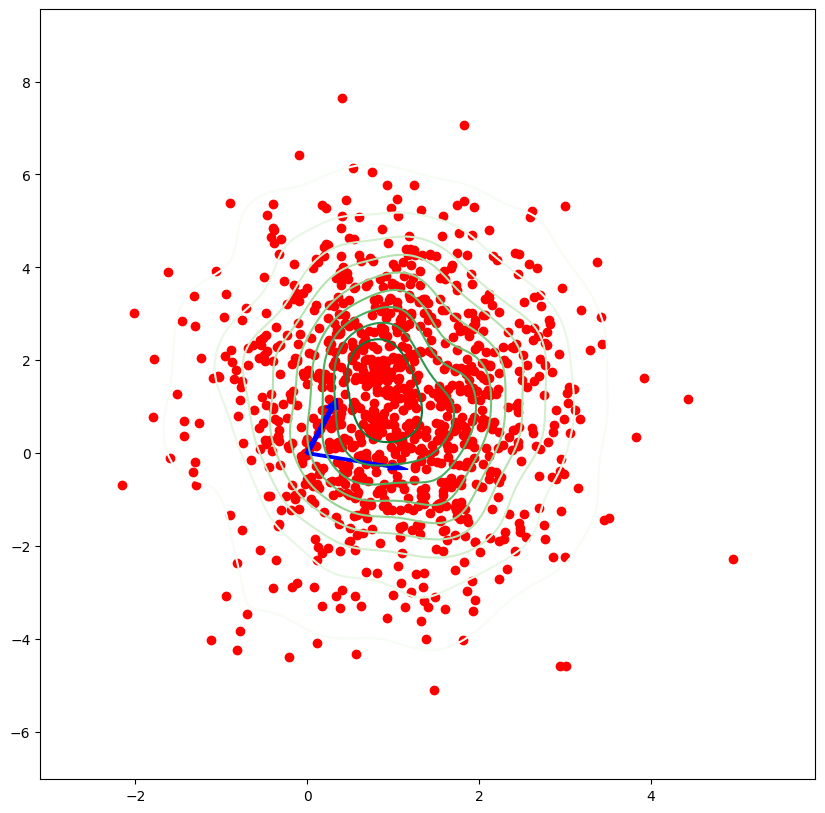

In [119]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], color='red')
plt.arrow(0, 0, VT[0][0], VT[0][1], color='b', width=0.05)
plt.arrow(0, 0, VT[1][0], VT[1][1], color='b', width=0.05)
sns.kdeplot(x=X[:, 0], y=X[:, 1], fill=False, cmap='Greens')
plt.show()

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

* Сложно понять куда вообще указывает 2 признак.
* Так же проблемно анализировать, когда сердцевина точек не отцентрирована. Перед анализом полученных данных, нужно сделать вычитание среднего, как мы это сделали ранее, чтобы сместить облако в центр и уже потом смотреть на признаки.